# SST: Analysis for Item Test

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as op

# for plotting
sns.set(style='whitegrid', context='poster')
%matplotlib inline

# R for stats
%load_ext rpy2.ipython
%R require(lme4)
%R require(lmerTest)

Loading required package: lme4
Loading required package: Matrix
Loading required package: Rcpp


Loading required package: lmerTest

Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step



## Setup paths

In [22]:
dirs = dict()
dirs['basedir'] = op.join(op.expanduser('~'), 'Experiments/SST')
dirs['datadir'] = op.join(dirs['basedir'], 'data')
dirs['analydir'] = op.join(dirs['basedir'], 'analysis')
dirs['subj_info_file'] = op.join(dirs['datadir'], 'subj_info.csv')

In [23]:
subj_info = pd.read_csv(dirs['subj_info_file'])
subj_info = subj_info[pd.isnull(subj_info.remove)]
subj_info[['subid']] = subj_info.subid.astype(str)

subj_info

,subid,group,voltage,remove
0,1,pilot,0,NaN
1,2,pilot,0,NaN
2,3,pilot,0,NaN
3,4,pilot,0,NaN


## Load in data

In [28]:
dt = pd.DataFrame() 
test = True
questionnaires_post  = False

for subid in subj_info.subid:
    print subid

    if test:
        # add test file
        test_file = op.join(dirs['datadir'], subid, subid + '_behav_itemTest_coded.csv')
        d2 = pd.read_csv(test_file)
        d2['subid'] = subid
        dt = dt.append(d2, ignore_index=True)
        
# Compiled group data
if questionnaires_post:
    q_file = op.join(dirs['basedir'], 'data/Quest/Questionnaires_group.csv')
    dq_post = pd.read_csv(q_file, index_col=0)

1
2
3
4


In [29]:
dt.head()

,index,run,trial,onset,duration,town,pic,itemNum,resp,respRT,itemType,acc,subid
0,7,1,3,39.8986,19.2681,Town1,env1.jpg,1,zebra,6.7555,animal,1,1
1,8,1,3,39.8986,19.2681,Town1,env1.jpg,2,george clooney,5.7986,face,1,1
2,9,1,3,39.8986,19.2681,Town1,env1.jpg,3,Lettuce,6.7118,object,1,1
3,52,2,6,89.7360,8.8618,Town1,env1.jpg,1,zebra,3.0541,animal,1,1
4,53,2,6,89.7360,8.8618,Town1,env1.jpg,2,george clooney,3.5342,face,1,1


## Analysis

### Accuracy across runs, by type of item

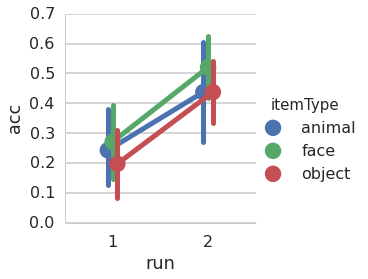

In [32]:
data = dt.groupby(['subid', 'run', 'itemType']).mean().reset_index()
sns.factorplot(x='run', y='acc', hue='itemType',
               dodge=.1,
               units='subid', ci=68, data=data)

#### Broken down by subject

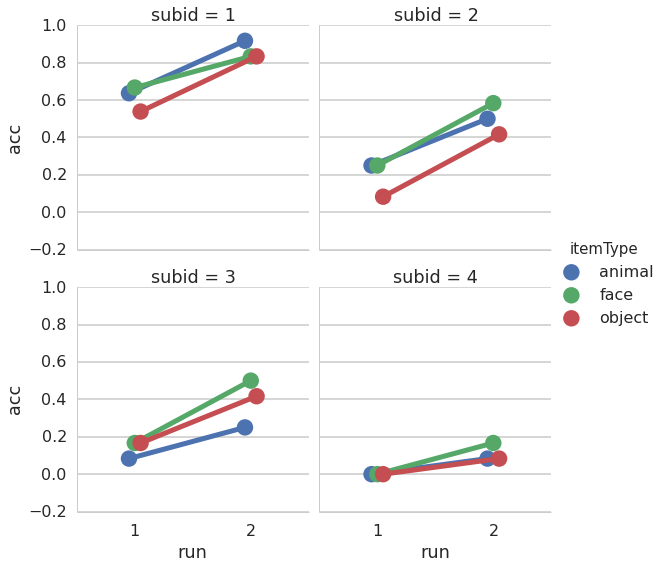

In [39]:
data = dt.groupby(['subid', 'run', 'itemType']).mean().reset_index()
sns.factorplot(x='run', y='acc', hue='itemType',
               dodge=.1,
               col='subid', col_wrap=2, data=data)

### Accuracy across environments

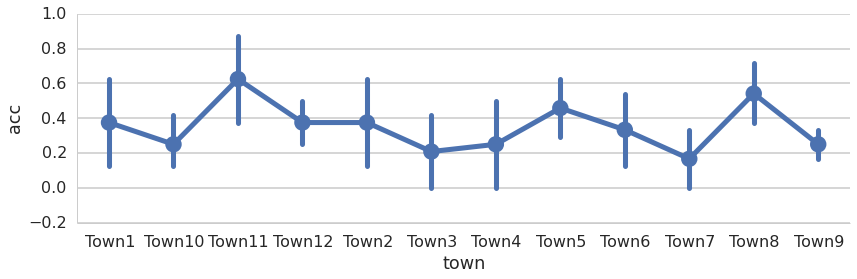

In [37]:
data = dt.groupby(['subid', 'run', 'town']).mean().reset_index()
sns.factorplot(x='town', y='acc', 
               dodge=.1, aspect=3,
               units='subid', ci=68, data=data)

### Order of recalling items

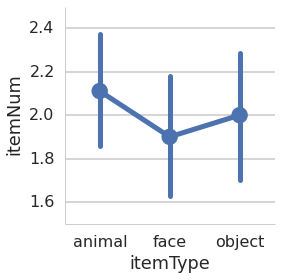

In [42]:
data = dt[dt.acc == 1].groupby(['subid', 'itemNum', 'itemType']).mean().reset_index()
sns.factorplot(x='itemType', y='itemNum', 
               dodge=.1,
               units='subid', ci=68, data=data)